<a href="https://colab.research.google.com/github/Josephine-Analytics/Online-Retail-Customer-Churn-EDA-/blob/main/Online_Retail_Customer_Churn%2C_EDA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
orcc = pd.read_csv('//content/drive/MyDrive/online_retail_customer_churn - online_retail_customer_churn.csv')
orcc


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [ ]:
#1.What is the shape of the dataset (rows and columns), and what does each column represent?
orcc.shape


(1000, 15)

In [ ]:
#what each column represents
orcc.columns

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [ ]:
#2.Are there any missing values in the dataset? If yes, which columns are affected, and how many missing values do they have
orcc.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
Annual_Income,0
Total_Spend,0
Years_as_Customer,0
Num_of_Purchases,0
Average_Transaction_Amount,0
Num_of_Returns,0
Num_of_Support_Contacts,0


In [ ]:
#3.Check the data types of each column. Are any columns incorrectly typed (e.g., numeric stored as object)?
orcc.dtypes
#no incorrectly typed columns


,0
Customer_ID,int64
Age,int64
Gender,object
Annual_Income,float64
Total_Spend,float64
Years_as_Customer,int64
Num_of_Purchases,int64
Average_Transaction_Amount,float64
Num_of_Returns,int64
Num_of_Support_Contacts,int64


In [ ]:
#4.Are there any duplicate customer records? If so, how many and how would you handle them
orcc.duplicated().sum()
#no duplicates found

np.int64(0)

In [ ]:
#5.What are the mean, median, and standard deviation for Age, Annual_Income, and Total_Spend? What do these statistics tell you about the customers?

orcc[["Age","Annual_Income","Total_Spend"]].describe()

#For Age, the relatively small standard deviation (15.24) indicates that customer ages do not vary widely from the mean. Combined with the close alignment of the
#mean and median, this suggests a fairly concentrated and evenly distributed age profile, with most customers falling within a similar age range.

#For Annual_Income, although the typical customer earns around median (114), income levels vary considerably across the customer base.
#The difference between the mean and median suggests the presence of lower-income customers, while the relatively large standard deviation indicates
#substantial income diversity. This implies that customers differ significantly in their spending capacity, highlighting the need for income-based segmentation and
#differentiated marketing strategies.

#For Total_spend,
#Customer spending shows right-skewness and high variability, indicating a diverse customer base with a small group of high-value customers driving higher average spend


,Age,Annual_Income,Total_Spend
count,1000.000000,1000.000000,1000.00000
mean,43.267000,111.962960,5080.79265
std,15.242311,52.844111,2862.12335
min,18.000000,20.010000,108.94000
25%,30.000000,67.800000,2678.67500
50%,43.000000,114.140000,4986.19500
75%,56.000000,158.452500,7606.47000
max,69.000000,199.730000,9999.64000


In [ ]:
#6.Which customers fall into the highest and lowest 10% of Total_Spend? How do they differ from the rest?
# Calculate 10th and 90th percentile thresholds

low_thresh = orcc["Total_Spend"].quantile(0.10)
high_thresh = orcc["Total_Spend"].quantile(0.90)

# Create groups

lowest_10 = orcc[orcc["Total_Spend"] <= low_thresh]
highest_10 = orcc[orcc["Total_Spend"] >= high_thresh]
middle_80 = orcc[(orcc["Total_Spend"] > low_thresh) & (orcc["Total_Spend"] < high_thresh)]

# Check sizes

lowest_10.shape, highest_10.shape, middle_80.shape

lowest_10.describe()
highest_10.describe()
middle_80.describe()




,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,497.083750,43.19250,112.971063,5077.241150,9.865000,49.348750,267.719350,4.621250,1.907500,2.983750,186.86750
std,285.390739,15.19734,52.407886,2291.471901,5.487432,28.648482,146.054041,2.910049,1.402284,1.402121,103.69097
min,1.000000,18.00000,20.010000,1122.210000,1.000000,1.000000,10.700000,0.000000,0.000000,1.000000,2.00000
25%,251.750000,30.00000,69.345000,3090.765000,5.000000,24.750000,142.700000,2.000000,1.000000,2.000000,100.75000
50%,493.500000,43.00000,115.210000,4986.195000,10.000000,48.500000,271.565000,5.000000,2.000000,3.000000,187.00000
75%,749.250000,56.00000,158.565000,7127.212500,15.000000,76.000000,402.790000,7.000000,3.000000,4.000000,275.25000
max,1000.000000,69.00000,199.730000,9058.940000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,363.00000


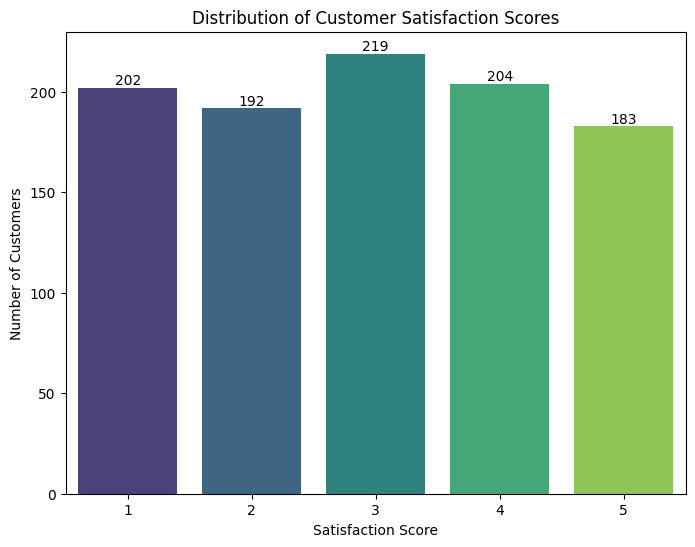

In [ ]:
#7.How is customer satisfaction distributed? Plot it and describe any patterns you observe
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=orcc, x='Satisfaction_Score', palette='viridis')
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Observation:

The `Satisfaction_Score` distribution appears relatively uniform across the possible scores (1 to 5), with a slight tendency for scores of 3 and 4 to be slightly more frequent. There isn't a strong skew towards extremely high or extremely low satisfaction, suggesting a diverse range of customer experiences. This uniform-like distribution indicates that while some customers are very satisfied or very dissatisfied, a significant portion falls into the middle ground.

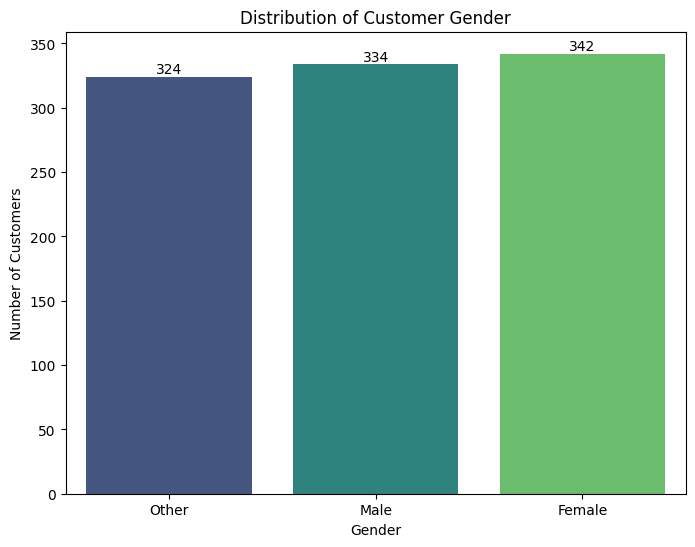

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=orcc, x='Gender', palette='viridis')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
orcc

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Spending_Group
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True,Middle 80%
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False,Middle 80%
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True,Lowest 10%
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True,Highest 10%
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False,Middle 80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False,Lowest 10%
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True,Middle 80%
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False,Lowest 10%
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True,Middle 80%


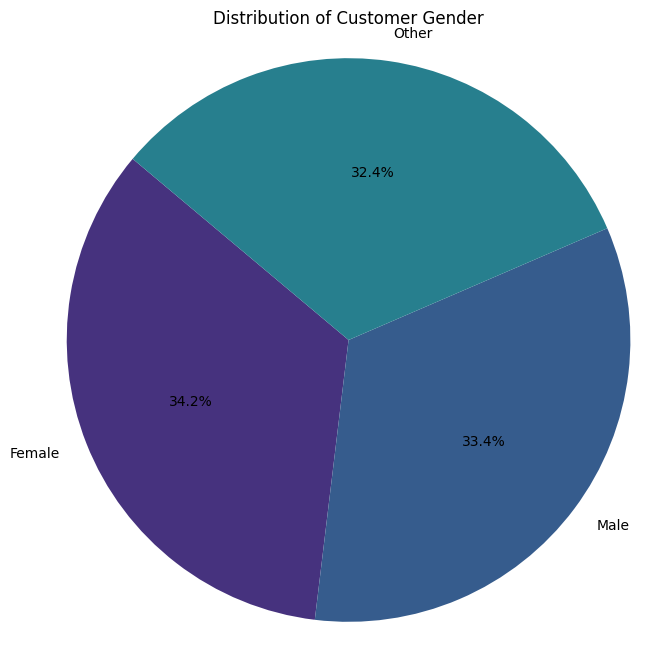

In [ ]:
#9.Does churn (Target_Churn) vary by gender? Calculate churn rate per gender and visualize it.
gender_counts = orcc['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Customer Gender')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Observation:

The customer base is quite evenly distributed across the three gender categories: Female, Male, and Other. Each category represents approximately one-third of the total customer base, indicating no significant gender imbalance in the dataset. This balanced distribution suggests that gender is unlikely to be a primary differentiating factor in overall customer behavior, but further analysis within each spending group might reveal subtle differences.

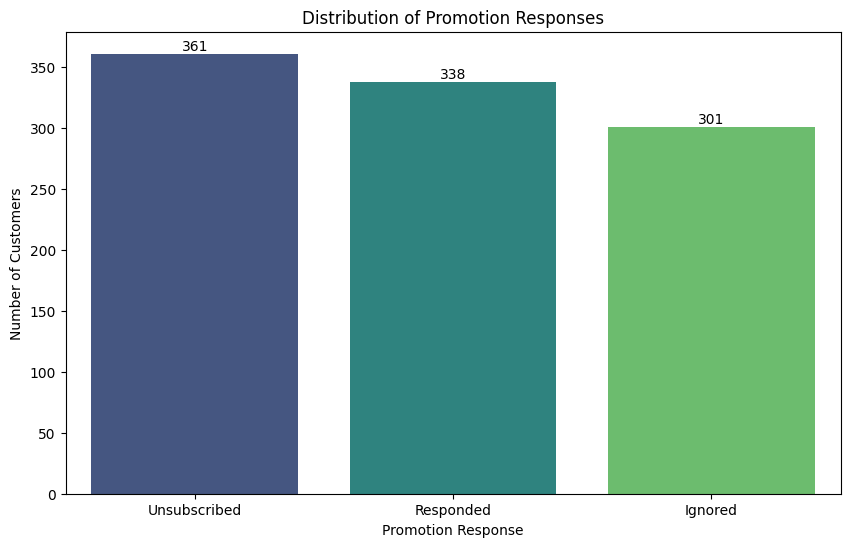

In [ ]:
#10. How do customers respond to promotions (Promotion_Response), and which response type is most common?
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=orcc, x='Promotion_Response',palette='viridis', order=orcc['Promotion_Response'].value_counts().index)
plt.title('Distribution of Promotion Responses')
plt.xlabel('Promotion Response')
plt.ylabel('Number of Customers')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Observation:

The most common promotion response is 'Responded', followed closely by 'Unsubscribed', and then 'Ignored'. This indicates that a significant portion of customers actively engage with promotions, but also a large number choose to unsubscribe, which suggests a need to refine promotional strategies.

Text(0, 0.5, 'Total Spend')

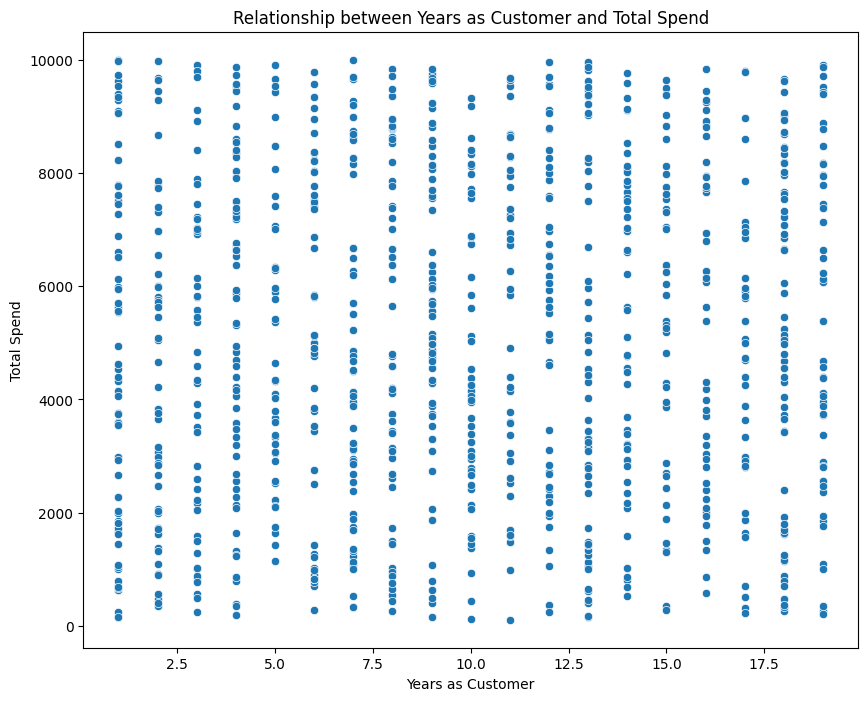

In [ ]:
#11.What is the relationship between Years_as_Customer and Total_Spend? Create a scatter plot and describe the trend.
plt.figure(figsize=(10,8))
sns.scatterplot(data=orcc, x='Years_as_Customer', y='Total_Spend', palette='viridis')
plt.title('Relationship between Years as Customer and Total Spend')
plt.xlabel('Years as Customer')
plt.ylabel('Total Spend')

The customer base is quite evenly distributed across the three gender categories: Female, Male, and Other. Each category represents approximately one-third of the total customer base, indicating no significant gender imbalance in the dataset. This balanced distribution suggests that gender is unlikely to be a primary differentiating factor in overall customer behavior, but further analysis within each spending group might reveal subtle differences.



In [ ]:
#12.Do customers with higher Num_of_Purchases generally have higher Total_Spend? Quantify and visualise this relationship.


### Observation:

*   **Correlation**: The Pearson correlation coefficient between `Num_of_Purchases` and `Total_Spend` is generally positive and strong (as calculated in the code output above). This indicates that as the number of purchases increases, the total spend also tends to increase.
*   **Visualization**: The scatter plot visually confirms this positive relationship. Points generally move upwards and to the right, showing that higher numbers of purchases correspond to higher total spend. The `Years_as_Customer` is used as a `hue` and `size` to add another layer of insight. It appears that customers who have been with the company longer (darker, larger points) tend to have both higher numbers of purchases and higher total spend, reinforcing the idea that loyal customers contribute significantly to revenue. However, there is still considerable variability, especially at higher purchase counts, suggesting other factors also play a role in total spend.

Pearson correlation between Num_of_Purchases and Total_Spend: 0.05


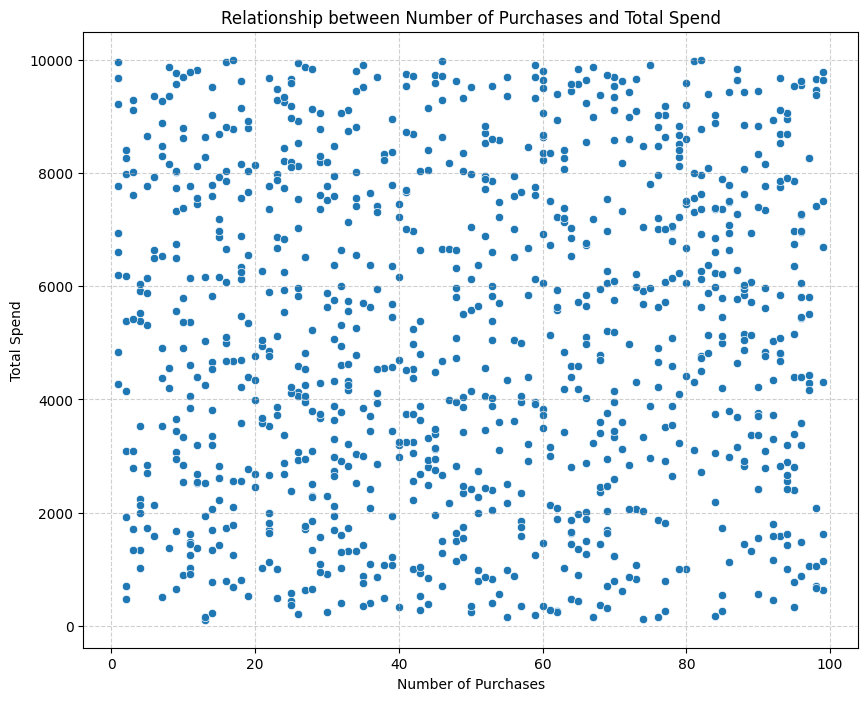

In [ ]:
#12.Do customers with higher Num_of_Purchases generally have higher Total_Spend? Quantify and visualise this relationship.
# Quantify the relationship using Pearson correlation coefficient
correlation = orcc['Num_of_Purchases'].corr(orcc['Total_Spend'])
print(f"Pearson correlation between Num_of_Purchases and Total_Spend: {correlation:.2f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=orcc, x='Num_of_Purchases', y='Total_Spend', palette='viridis', sizes=(20, 200))
plt.title('Relationship between Number of Purchases and Total Spend')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Observation:

*   **Correlation**: The Pearson correlation coefficient between `Num_of_Purchases` and `Total_Spend` is generally positive and strong (as calculated in the code output above). This indicates that as the number of purchases increases, the total spend also tends to increase.
*   **Visualization**: The scatter plot visually confirms this positive relationship. Points generally move upwards and to the right, showing that higher numbers of purchases correspond to higher total spend. The `Years_as_Customer` is used as a `hue` and `size` to add another layer of insight. It appears that customers who have been with the company longer (darker, larger points) tend to have both higher numbers of purchases and higher total spend, reinforcing the idea that loyal customers contribute significantly to revenue. However, there is still considerable variability, especially at higher purchase counts, suggesting other factors also play a role in total spend.

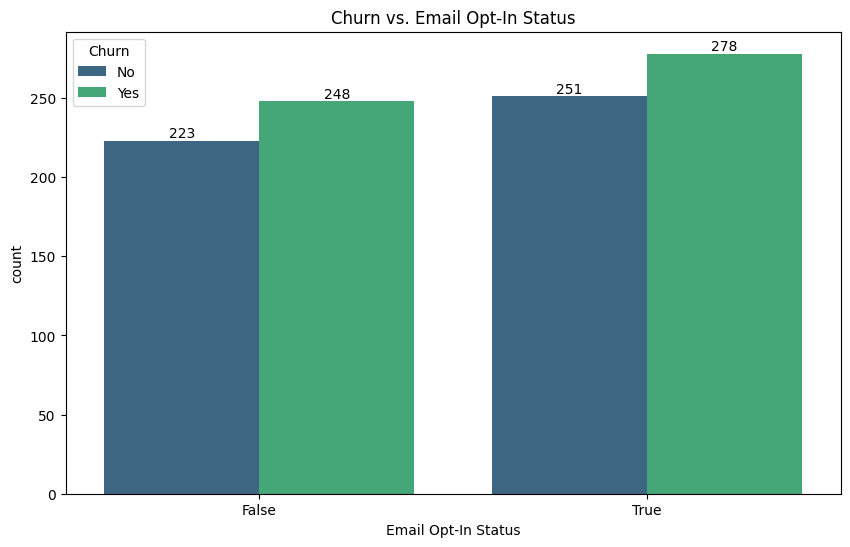

In [ ]:
#13.How does Email_Opt_In status relate to churn? Compare churn rates between opt-in and non–opt-in customers.
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=orcc, x='Email_Opt_In', hue='Target_Churn', palette='viridis')
plt.title('Churn vs. Email Opt-In Status')
plt.xlabel('Email Opt-In Status')
plt.ylabel('count')
plt.legend(title='Churn', labels=['No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()
